In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
#from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import os
from datetime import datetime
#from phik.report import plot_correlation_matrix
#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from featurewiz import featurewiz
#from optbinning import BinningProcess
from sklearn.metrics import classification_report
# import openpyxl
#from pycaret.classification import *
# import re
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, auc
import pickle
# import jenkspy
# from openpyxl.drawing.image import Image
# from openpyxl import load_workbook
# from imblearn.over_sampling import SMOTE
# from collections import Counter
from keras.models import load_model

In [69]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set()

In [70]:
file_path = "bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv"
df = pd.read_csv(file_path)

In [71]:
df_bitcoin = df.copy()
df_bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,"58,714.31","58,714.31","58,686.00","58,686.00",1.38,"81,259.37","58,692.75"
4857373,1617148620,"58,683.97","58,693.43","58,683.97","58,685.81",7.29,"428,158.15","58,693.23"
4857374,1617148680,"58,693.43","58,723.84","58,693.43","58,723.84",1.71,"100,117.07","58,696.20"
4857375,1617148740,"58,742.18","58,770.38","58,742.18","58,760.59",0.72,"42,332.96","58,761.87"


In [72]:
df_bitcoin['Data'] = pd.to_datetime(df_bitcoin['Timestamp'], unit='s')
df_bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
0,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,"58,714.31","58,714.31","58,686.00","58,686.00",1.38,"81,259.37","58,692.75",2021-03-30 23:56:00
4857373,1617148620,"58,683.97","58,693.43","58,683.97","58,685.81",7.29,"428,158.15","58,693.23",2021-03-30 23:57:00
4857374,1617148680,"58,693.43","58,723.84","58,693.43","58,723.84",1.71,"100,117.07","58,696.20",2021-03-30 23:58:00
4857375,1617148740,"58,742.18","58,770.38","58,742.18","58,760.59",0.72,"42,332.96","58,761.87",2021-03-30 23:59:00


In [73]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Data               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 333.5 MB


In [74]:
def describex(data):
    data = pd.DataFrame(data)
    stats = data.describe(percentiles=[0.01,0.25,0.5,0.75,0.90,0.95,0.99])
    skewness = data.skew()
    kurtosis = data.kurtosis()
    skewness_df = pd.DataFrame({'skewness' : skewness}).T
    kurtosis_df = pd.DataFrame({'kurtosis' : kurtosis}).T
    mediane = data.median()
    mediane_df = pd.DataFrame({'mediane' : mediane}).T
    valori_missing = pd.DataFrame({'valori missing': data.isna().sum()}).T
    percentuale_missing = ((data.isna().sum() / len(data) * 100).round(2)).apply(lambda x: f'{x}%')
    percentuale_missing_df = pd.DataFrame({'percentuale missing': percentuale_missing}).T
    valori_unici = pd.DataFrame({'valori_unici':data.nunique()}).T
    return pd.concat([stats, kurtosis_df, skewness_df, mediane_df, valori_missing, percentuale_missing_df, valori_unici])

In [75]:
describex(df_bitcoin)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mediane = data.median()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
count,"4,857,377.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00",NaN
mean,"1,471,300,766.50","6,009.02","6,013.36","6,004.49","6,009.01",9.32,"41,762.84","6,008.93",NaN
std,"84,280,194.38","8,996.25","9,003.52","8,988.78","8,996.36",30.55,"151,824.78","8,995.99",NaN
min,"1,325,317,920.00",3.80,3.80,1.50,1.50,0.00,0.00,3.80,NaN
1%,"1,328,232,345.60",29.98,29.98,29.98,29.98,0.01,7.03,29.98,NaN
25%,"1,398,178,560.00",443.86,444.00,443.52,443.86,0.41,452.14,443.83,NaN
50%,"1,471,427,520.00","3,596.97","3,598.19","3,595.62","3,597.00",1.98,"3,810.12","3,596.80",NaN
75%,"1,544,288,160.00","8,627.27","8,632.98","8,621.09","8,627.16",7.28,"25,698.21","8,627.64",NaN
90%,"1,588,004,544.00","11,490.72","11,498.43","11,484.01","11,490.92",20.80,"94,496.40","11,491.46",NaN
95%,"1,602,576,672.00","18,380.57","18,390.66","18,370.78","18,381.24",39.12,"187,786.87","18,380.76",NaN


In [76]:
df_bitcoin.shape

(4857377, 9)

In [77]:
df_bitcoin.isna().sum().sum()/(df.shape[0]*df.shape[1])

0.22402152437416326

<h6> Trasformazione 1 (riduzione dati) </h6>

In [78]:
df_bitcoin_ridotti = df_bitcoin.iloc[:]

In [79]:
df_bitcoin_ridotti

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
0,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,"58,714.31","58,714.31","58,686.00","58,686.00",1.38,"81,259.37","58,692.75",2021-03-30 23:56:00
4857373,1617148620,"58,683.97","58,693.43","58,683.97","58,685.81",7.29,"428,158.15","58,693.23",2021-03-30 23:57:00
4857374,1617148680,"58,693.43","58,723.84","58,693.43","58,723.84",1.71,"100,117.07","58,696.20",2021-03-30 23:58:00
4857375,1617148740,"58,742.18","58,770.38","58,742.18","58,760.59",0.72,"42,332.96","58,761.87",2021-03-30 23:59:00


In [80]:
df_bitcoin_ridotti[df_bitcoin_ridotti['Open'].isna()]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:57:00
...,...,...,...,...,...,...,...,...,...
4856245,1617080940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-30 05:09:00
4856308,1617084720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-30 06:12:00
4856376,1617088800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-30 07:20:00
4857340,1617146640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-30 23:24:00


In [81]:
describex(df_bitcoin_ridotti)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_122372\736779343.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mediane = data.median()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
count,"4,857,377.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00","3,613,769.00",NaN
mean,"1,471,300,766.50","6,009.02","6,013.36","6,004.49","6,009.01",9.32,"41,762.84","6,008.93",NaN
std,"84,280,194.38","8,996.25","9,003.52","8,988.78","8,996.36",30.55,"151,824.78","8,995.99",NaN
min,"1,325,317,920.00",3.80,3.80,1.50,1.50,0.00,0.00,3.80,NaN
1%,"1,328,232,345.60",29.98,29.98,29.98,29.98,0.01,7.03,29.98,NaN
25%,"1,398,178,560.00",443.86,444.00,443.52,443.86,0.41,452.14,443.83,NaN
50%,"1,471,427,520.00","3,596.97","3,598.19","3,595.62","3,597.00",1.98,"3,810.12","3,596.80",NaN
75%,"1,544,288,160.00","8,627.27","8,632.98","8,621.09","8,627.16",7.28,"25,698.21","8,627.64",NaN
90%,"1,588,004,544.00","11,490.72","11,498.43","11,484.01","11,490.92",20.80,"94,496.40","11,491.46",NaN
95%,"1,602,576,672.00","18,380.57","18,390.66","18,370.78","18,381.24",39.12,"187,786.87","18,380.76",NaN


<h6> Trasformazione 2 (imputing dei valori nan) </h6>

In [82]:
df_bitcoin_senza_nan = df_bitcoin_ridotti.fillna(method='ffill') # ffill: propagate last valid observation forward to next valid
df_bitcoin_senza_nan

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Data
0,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:56:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,"58,714.31","58,714.31","58,686.00","58,686.00",1.38,"81,259.37","58,692.75",2021-03-30 23:56:00
4857373,1617148620,"58,683.97","58,693.43","58,683.97","58,685.81",7.29,"428,158.15","58,693.23",2021-03-30 23:57:00
4857374,1617148680,"58,693.43","58,723.84","58,693.43","58,723.84",1.71,"100,117.07","58,696.20",2021-03-30 23:58:00
4857375,1617148740,"58,742.18","58,770.38","58,742.18","58,760.59",0.72,"42,332.96","58,761.87",2021-03-30 23:59:00


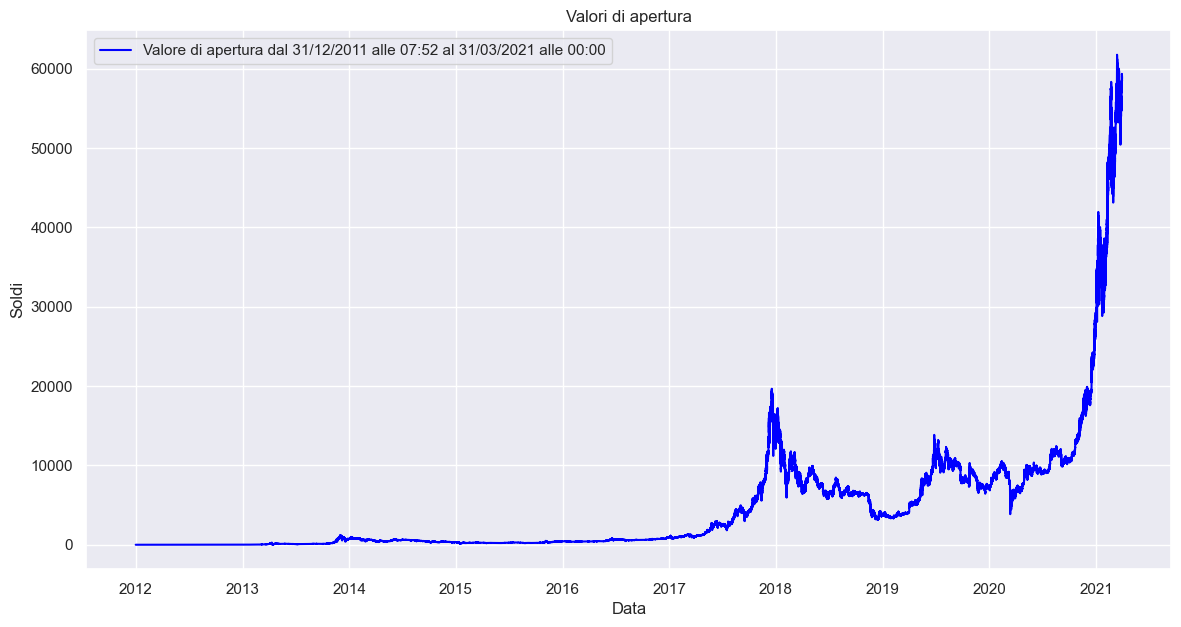

In [87]:
x = df_bitcoin_senza_nan['Data']
y = df_bitcoin_senza_nan['Open']
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Valore di apertura dal {str(x.iloc[0].strftime('%d/%m/%Y alle %H:%M'))} al {str(x.iloc[-1].strftime('%d/%m/%Y alle %H:%M'))}", color='blue')
plt.title('Valori di apertura')
plt.xlabel('Data')
plt.ylabel('Soldi')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Esporto il dataset senza i nan
# df_bitcoin_senza_nan.to_csv('Stesso dataset con nan imputati con ffill.csv', index=False)